In [1]:
library(ggplot2)
library(dplyr)
library(grid)
library(gridExtra)
report_theme <- theme_bw() + theme(
  panel.background = element_rect(fill = "#E8EBEF"),
  axis.text = element_text(size = 20, color = "#143264"),
  axis.title = element_text(size = 20, color = "#143264"),
  title = element_text(color = "#143264", size = 20),
  legend.title = element_text(color = "#143264", size = 14),
  legend.text = element_text(color = "#143264", size = 14),
  strip.text = element_text(size = 14)
)

k <- 2
n <- 30
reps <- 1e5


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
set.seed(1234)
samples <- replicate(reps, sort(sample(n, k, replace = FALSE)))
dim(samples)
head(samples)

[1]      2 100000

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]  4   19   19   1    15   16    9    9   8    6     ⋯      4    24    19   
[2,] 19   30   26   7    20   21   27   25   9    7     ⋯     26    30    27   
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] 16     9     7     1    4     10     1   
[2,] 29    28    24    23    6     13    29

In [3]:
counts <- table(apply(samples, 2, function(x) paste0(sort(x), collapse=",")))
head(counts)


1,10 1,11 1,12 1,13 1,14 1,15 
 222  203  232  229  235  245 

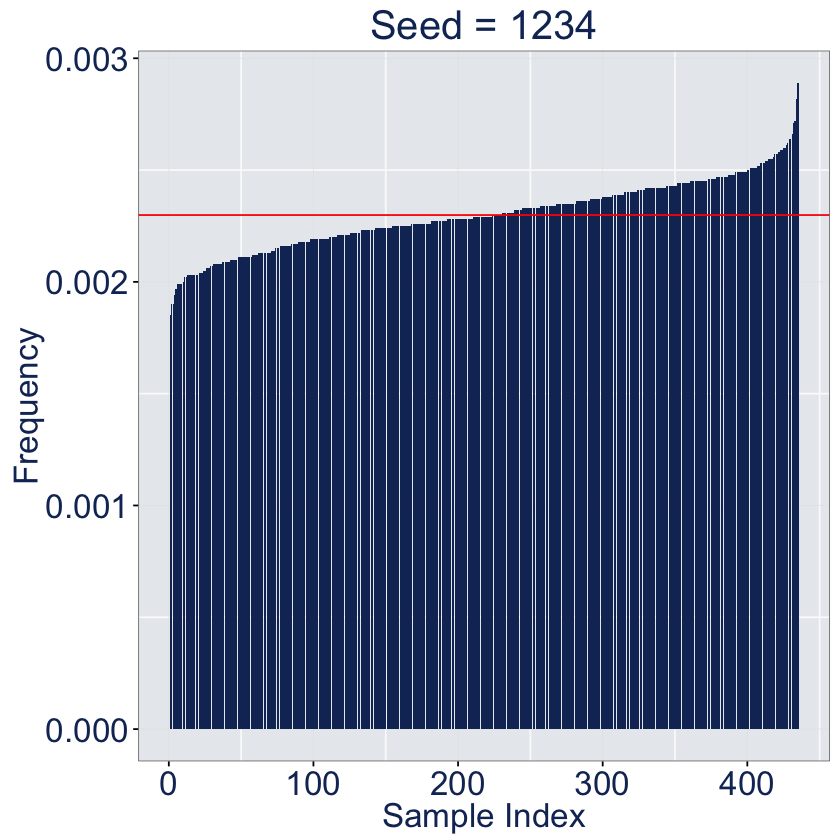

In [4]:
counts1 <- sort(counts)
counts1 <- counts1 %>% as.data.frame() %>% mutate("Index" = 1:length(counts1), "Freq" = as.vector(counts1)/reps)
p1 <- counts1 %>%
  ggplot(aes(x = Index, y = Freq)) + geom_bar(stat = "identity", fill = "#143264") +
  xlab("Sample Index") +
  ylab("Frequency") + 
  ggtitle(paste0("Seed = ", 1234)) +
  geom_hline(yintercept = 1/choose(n, k), color = "red") + 
  report_theme
p1

In [5]:
set.seed(20000560)
samples2 <- replicate(reps, sort(sample(n, k, replace = FALSE)))
dim(samples2)

[1]      2 100000

In [6]:
counts <- table(apply(samples2, 2, function(x) paste0(sort(x), collapse=",")))
head(counts)


1,10 1,11 1,12 1,13 1,14 1,15 
 269  211  211  208  201  243 

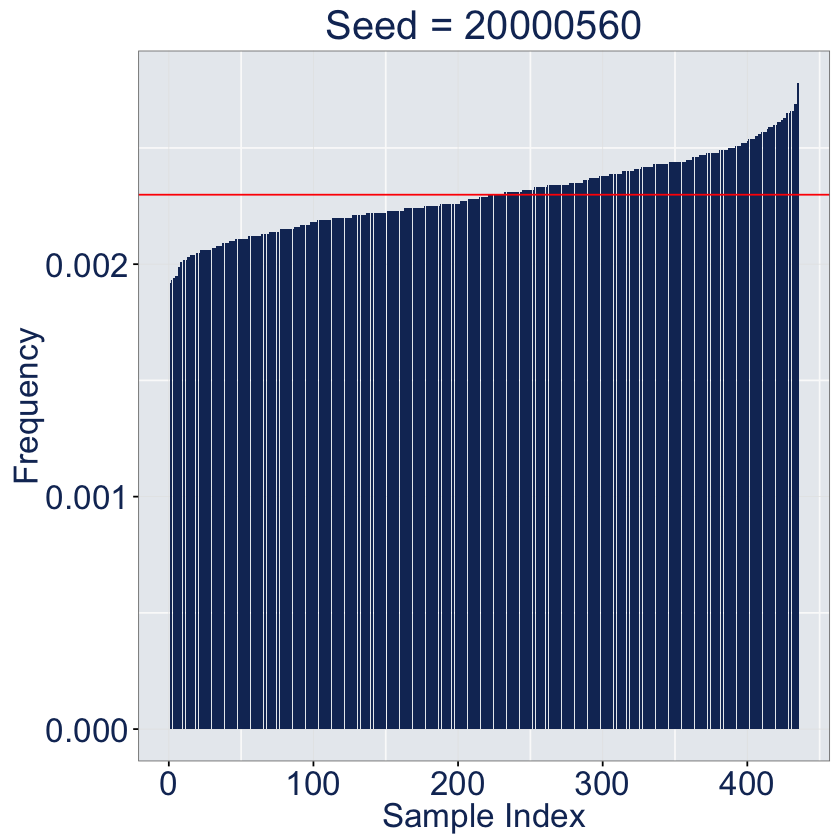

In [7]:
counts2 <- sort(counts) 
counts2 <- counts2 %>% as.data.frame() %>% mutate("Index" = 1:length(counts2), "Freq" = as.vector(counts2)/reps)
p2 <- counts2 %>%
  ggplot(aes(x = Index, y = Freq)) + geom_bar(stat = "identity", fill = "#143264") +
  xlab("Sample Index") +
  ylab("Frequency") + 
  ggtitle(paste0("Seed = ", 20000560)) +
  geom_hline(yintercept = 1/choose(n, k), color = "red") + 
  report_theme
p2

In [8]:
set.seed(251076398) # Generated on random.org Timestamp: 2017-01-01 23:16:32 UTC
samples3 <- replicate(reps, sort(sample(n, k, replace = FALSE)))
dim(samples3)

[1]      2 100000

In [9]:
counts <- table(apply(samples3, 2, function(x) paste0(sort(x), collapse=",")))
head(counts)


1,10 1,11 1,12 1,13 1,14 1,15 
 251  231  217  207  215  232 

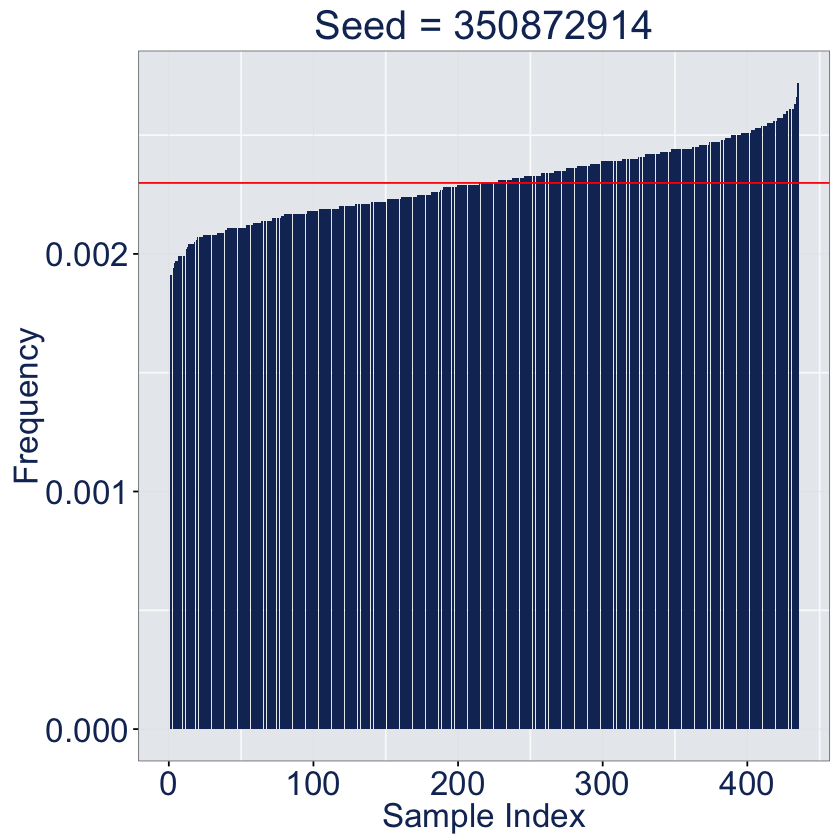

In [10]:
counts3 <- sort(counts) 
counts3 <- counts3 %>% as.data.frame() %>% mutate("Index" = 1:length(counts3), "Freq" = as.vector(counts3)/reps)
p3 <- counts3 %>%
  ggplot(aes(x = Index, y = Freq)) + geom_bar(stat = "identity", fill = "#143264") +
  xlab("Sample Index") +
  ylab("Frequency") + 
  ggtitle(paste0("Seed = ", 350872914)) +
  geom_hline(yintercept = 1/choose(n, k), color = "red") + 
  report_theme
p3

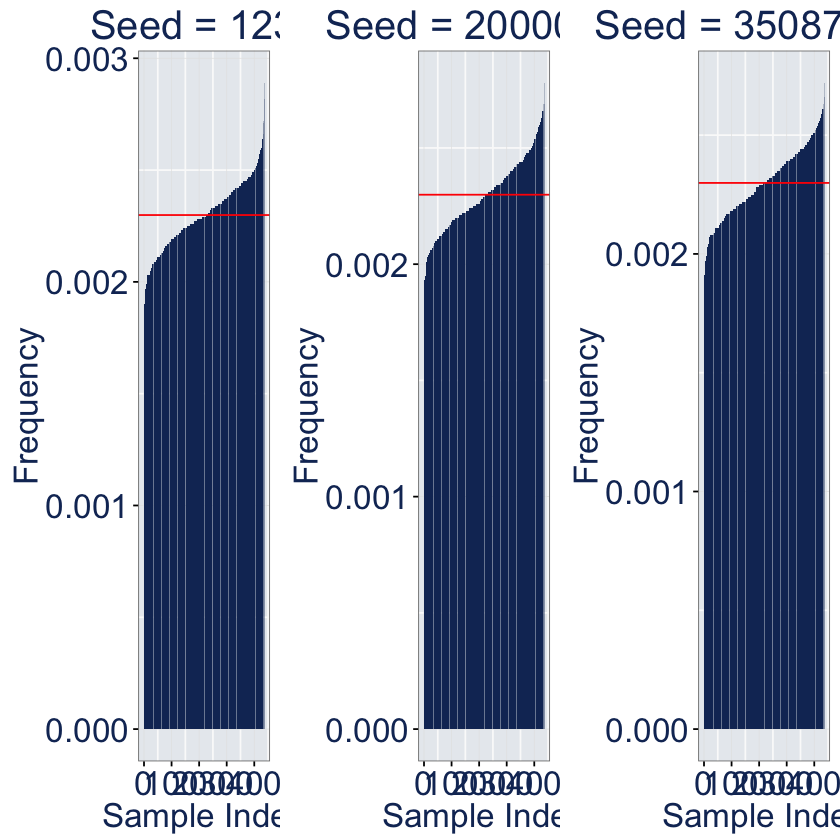

In [11]:
grid.arrange(p1, p2, p3, nrow = 1)

[1] 0.32712844 0.09341178 0.62942871


pdf 
  2

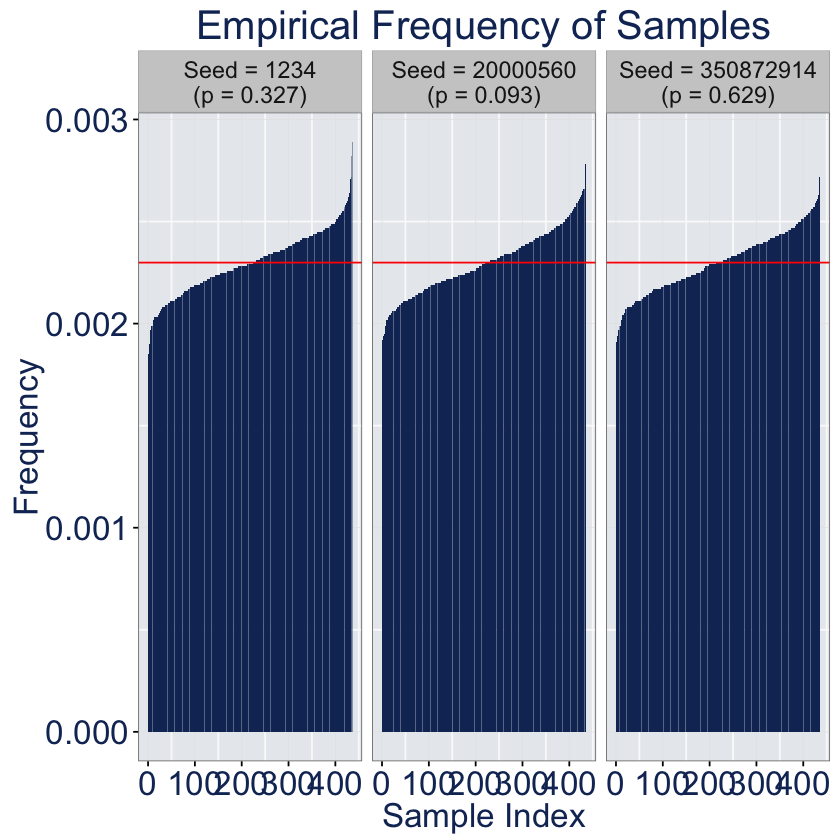

In [12]:
pvalues_tot <- c(chisq.test(counts1$Freq*reps)$p.value,
                 chisq.test(counts2$Freq*reps)$p.value,
                 chisq.test(counts3$Freq*reps)$p.value)
print(pvalues_tot)

counts1 <- mutate(counts1, 
                  "Seed" = rep("Seed = 1234", nrow(counts1)), 
                  "Pvalue" = rep(paste0("(p = ", round(pvalues_tot[1], 3), ")")))
counts2 <- mutate(counts2, 
                  "Seed" = rep("Seed = 20000560", nrow(counts2)), 
                  "Pvalue" = rep(paste0("(p = ", round(pvalues_tot[2], 3), ")")))
counts3 <- mutate(counts3, 
                  "Seed" = rep("Seed = 350872914", nrow(counts3)), 
                  "Pvalue" = rep(paste0("(p = ", round(pvalues_tot[3], 3), ")")))
counts_tot <- do.call(rbind, list(counts1, counts2, counts3))
counts_tot$facet <- paste0(counts_tot$Seed, "\n", counts_tot$Pvalue)

plotall <- counts_tot %>%
  ggplot(aes(x = Index, y = Freq)) + geom_bar(stat = "identity", fill = "#143264") +
  xlab("Sample Index") +
  ylab("Frequency") + 
  ggtitle("Empirical Frequency of Samples") +
  geom_hline(yintercept = 1/choose(n, k), color = "red") + 
  facet_grid(~facet) +
  report_theme
plotall

pdf("../fig/bad-seeds.pdf", width = 12)
plotall
dev.off()